# Multi-Layer Perceptron

In this lab you will explore how to create and fit multi-layer perceptron (MLP) models to data.

In [33]:
import sklearn
import numpy as np
from sklearn.datasets import make_moons
from matplotlib import pyplot as plt

from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions

from sklearn.neural_network import MLPClassifier


First we create a toy dataset using the `make_moons` function.

In [34]:
x,y = make_moons()

The data consists of 2D points and binary labels (0 or 1).

In [35]:
x[:5]

array([[ 0.46253829,  0.88659931],
       [-0.28452759,  0.95866785],
       [ 1.03205158, -0.49948622],
       [ 0.92691676,  0.375267  ],
       [-0.67230089,  0.740278  ]])

In [36]:
y[:5]

array([0, 0, 1, 0, 0])

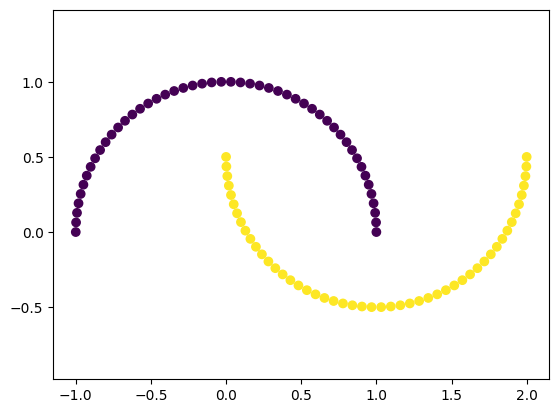

In [37]:
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.axis('equal')
plt.show()

First we will fit a linear classifier to this data, using the `LogisticRegression` class.

*(Even though it is called "regression," this model is for classification problems.)*

In [38]:
LR = LogisticRegression(penalty=None).fit(x,y)

The `predict` function predicts labels for input data. 

In [39]:
ypred = LR.predict(x)

In [40]:
ypred[:5]

array([0, 0, 1, 0, 0])

The `plot_decision_regions` function from `mlxtend` illustrates how a classification model divides the descriptor space into classes.

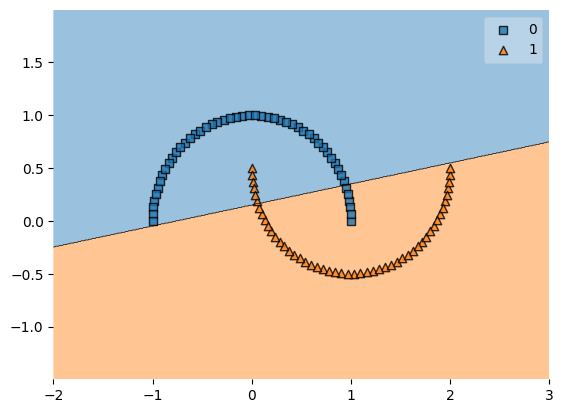

In [41]:
plot_decision_regions(x, y, clf=LR)
plt.show()

Clearly the linear model is unable to separate the moons dataset.

## Exercises

Now it's your turn -- try a MLP on this dataset!

1. Create an `MLPClassifier` and fit it to the moons dataset.  Leave the parameters at the default settings.

Calculate the accuracy on the training set and plot the decision regions.  

2. Change the parameters of the model until you can reach 100% accuracy.

Here are some ideas: increase the hidden layer size and and add more hidden layers; increase the number of iterations; reduce the regularization strength (```alpha```).

Here I make some random data with three classes.

In [42]:
x = np.random.random(size=(100,2))
y = np.random.randint(3,size=(100))

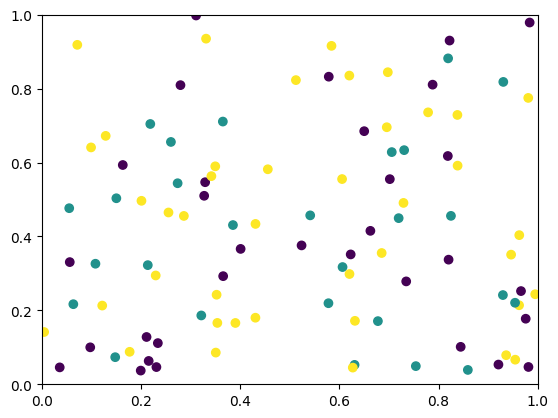

In [43]:
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

3. Plot the decision regions for the MLP with an increasing number of layers to show the effect of choosing a larger model versus a smaller model.

4. This time, use an MLP with three layers and 200 neurons per layer. Plot the decision regions as you increase regularization strength.